# F: Ejercicios resueltos

***
**Ejercicio F.1:**

Mejorar la función que calcula la fotometría para restar el fondo utilizando un anillo alrededor de la estrella `CircularAnnules`. Para ello habrá que calcular el brillo medio de dicho anillo y restarle a las cuentas de la estrella el brillo medio multiplicado por el área de la apertura (`aperture.area`).

In [1]:
def doPhotometry2(data, positions):
    aperture = CircularAperture(positions, r=3.)       # Fotometría en un círculo de radio 3
    apertureBackground = CircularAnnulus(positions, r_in=5., r_out=7.)    # Anillo de radios 5 y 7 para calcular el fondo local de la fuente
    
    photTable = aperture_photometry(data, aperture)                       # Hacemos ambas fotometrías
    photTableBackground = aperture_photometry(data, apertureBackground)   #
 
    avgBackground = photTableBackground['aperture_sum'] / apertureBackground.area  # Calculamos la media del fondo

    newPhotTable = photTable['aperture_sum'] - (avgBackground * aperture.area)     # Le restamos a la fuente el fondo
          
    res = newPhotTable.tolist()
    
    return res

***
**Ejercicio F.2:**

Suavizar la curva de luz obtenida usando una convolución.

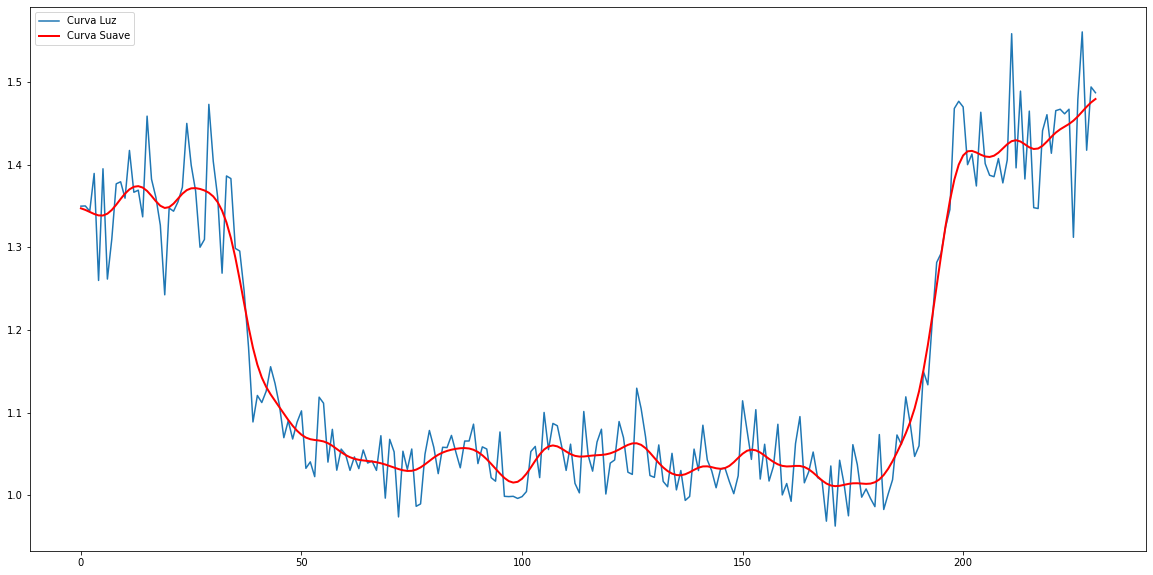

In [2]:
from astropy.convolution import Gaussian1DKernel, convolve
import json
import matplotlib.pyplot as plt

with open('salidas/curvaLuz.json') as fich:
    curvaLuz = json.load(fich)

g = Gaussian1DKernel(stddev=3)
curvaSuave = convolve(curvaLuz, g, boundary='extend')

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(curvaLuz, label='Curva Luz')
plt.plot(curvaSuave, label='Curva Suave', linewidth=2, color='red')
plt.legend(loc='best')
plt.show()